# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
url = 'https://estefaniaboutiquesuites.com/en/ecommerce/body-treatments-massages-peelings-tenerife-south-c19.html'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=3" name="viewport"/>
<meta content="en" http-equiv="content-language"/>
<title>Body Treatments | Massages and Peelings | Estefanía Boutique Suites Hotel</title>
<meta content="Discover exclusive body treatments in Tenerife South. Relax with massages, peelings and therapies designed to revitalize body and mind. Book now." name="description"/>
<meta content="index,follow" name="robots"/>
<meta content="Body Treatments | Massages and Peelings | Estefanía Boutique Suites Hotel" property="og:title"/>
<meta content="Discover exclusive body treatments in Tenerife South. Relax with massages, peelings and therapies designed to revitalize body and mind. Book now." property="og:description"/>
<meta content="https://estefaniaboutiquesuites.com/https://estefaniaboutiquesuites.com/cache/img/DSC05292_1500_1500_0_173739

In [3]:
treatments = soup.find_all('div', class_='item-wrapper')
len(treatments), treatments[0]

(16,
 <div class="item-wrapper">
 <div class="item">
 <a aria-label="Body peeling + Body wraps + 30 min. massage with essential oils" href="https://estefaniaboutiquesuites.com/en/ecommerce/body-peeling-body-wraps-massage-arona-tenerife-south-i30.html">
 <div class="item-image">
 <img alt="Body Peeling + Wraps + Massage with Oils in Arona, Tenerife South | Hotel Estefania Boutique Suites" src="/_images/sites/estefania-boutique-suites1744/catalogue/items/30/envolturas-corporales.png?w=240&amp;h=240&amp;c=1"/>
 </div>
 <div class="item-info">
 <div class="item-name">Body peeling + Body wraps + 30 min. massage with essential oils</div>
 <div class="item-shortdescription"><p>Renew and revitalize your skin with this comprehensive treatment that combines an exfoliating body peel with rejuvenating body wraps.</p></div>
 <div class="item-price">
 <span class="item-price-final">150<span class="cent">,00</span><span class="currency">€</span></span>
 </div>
 </div>
 </a>
 </div>
 </div>)

In [4]:
list_treatments = []
for treatment in treatments:
    treatment_name = treatment.find('div', class_='item-name').text
    price = treatment.find('span', class_='item-price-final').text
    price_string = price[:-1]
    clear_price = price_string.replace(',','.')
    description = treatment.find('div', class_='item-shortdescription').text
    list_treatments.append({'treatment': treatment_name,
                           'price': clear_price,
                           'description': description})
    
list_treatments

[{'treatment': 'Body peeling + Body wraps + 30 min. massage with essential oils',
  'price': '150.00',
  'description': 'Renew and revitalize your skin with this comprehensive treatment that combines an exfoliating body peel with rejuvenating body wraps.'},
 {'treatment': 'Face peeling + Anti-aging mask',
  'price': '100.00',
  'description': 'Revitalize your skin and reduce the signs of aging with our combined facial peel and anti-aging mask treatment.'},
 {'treatment': 'Body Peeling + Relaxing Massage',
  'price': '120.00',
  'description': 'Renew your skin and enjoy a complete relaxation experience with our Body Peeling followed by a 30-minute Relaxing Massage.'},
 {'treatment': 'Body Peeling',
  'price': '90.00',
  'description': 'Revitalize and rejuvenate your skin with our body peel, an exfoliating treatment designed to promote cell regeneration.'},
 {'treatment': 'Lymphatic Drainage',
  'price': '65.00',
  'description': 'Improve your circulation and detoxify your body with our 

In [5]:
df_treatments = pd.DataFrame(list_treatments)
df_treatments
#df_treatments_sorted = df_treatments.sort_values(by='price', ascending=False)
#df_treatments_sorted

,treatment,price,description
0,Body peeling + Body wraps + 30 min. massage wi...,150.00,Renew and revitalize your skin with this compr...
1,Face peeling + Anti-aging mask,100.00,Revitalize your skin and reduce the signs of a...
2,Body Peeling + Relaxing Massage,120.00,Renew your skin and enjoy a complete relaxatio...
3,Body Peeling,90.00,Revitalize and rejuvenate your skin with our b...
4,Lymphatic Drainage,65.00,Improve your circulation and detoxify your bod...
5,Sea Malay Massage (Queen's Massage),65.00,Experience luxury and well-being with our excl...
6,Special Oil Massage,50.00,"Repair, revitalize, and enjoy a unique sensory..."
7,Canary Massage,50.00,Immerse yourself in a unique experience with t...
8,Osteopathy,70.00,"Address spinal, hip, and joint problems with o..."
9,"Back, Neck and Shoulder Massage",55.00,Relieve tension and improve your posture with ...


In [6]:
conn = sqlite3.connect('treatments_list.db')

In [7]:
cursor = conn.cursor()

In [8]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS treatments (
    id INTEGER PRIMERY KEY,
    treatment TEXT,
    price INTEGER
    description TEXT
)
''')

In [9]:
cursor.execute('INSERT INTO treatments...')

OperationalError: near ".": syntax error

In [ ]:
conn.commit()
conn.close()

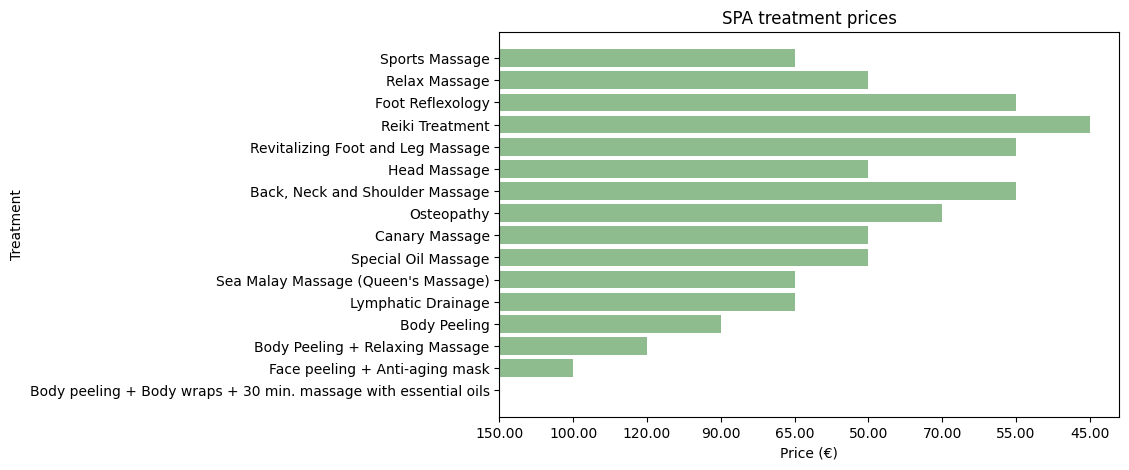

In [30]:
#df_sorted = df_treatments.sort_values(by='price', ascending=False)
labels = df_treatments['treatment']
values = df_treatments['price']
colours = ['darkseagreen']
plt.figure(figsize= (8, 5))
plt.barh(labels, values, color=colours)
plt.xlabel('Price (€)')
plt.ylabel('Treatment')
plt.title('SPA treatment prices')
plt.show()

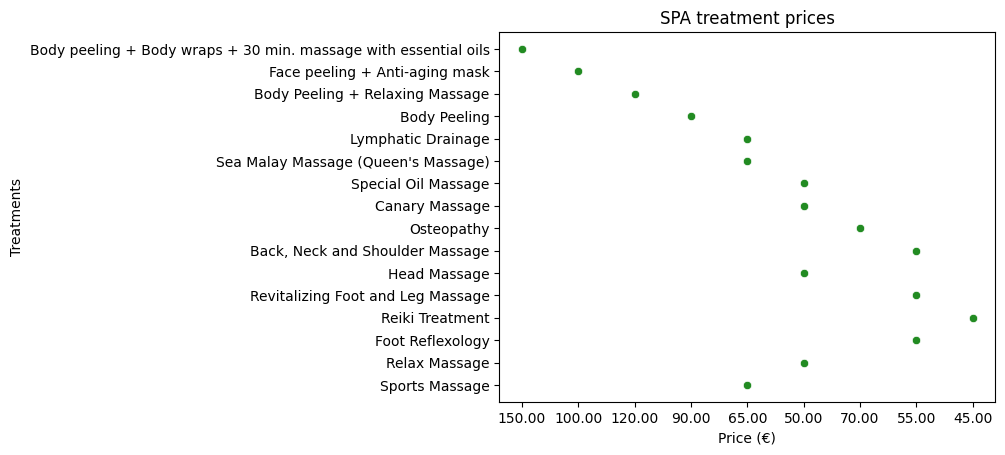

In [27]:
sns.scatterplot(x='price', y='treatment', data=df_treatments, color='forestgreen')
plt.xlabel('Price (€)')
plt.ylabel('Treatments')
plt.title('SPA treatment prices')
plt.show()
